In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
!git clone https://github.com/pjreddie/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 5910, done.
remote: Total 5910 (delta 0), reused 0 (delta 0), pack-reused 5910
Receiving objects: 100% (5910/5910), 6.33 MiB | 1.13 MiB/s, done.
Resolving deltas: 100% (3922/3922), done.


In [ ]:
!nvcc --version


nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


In [ ]:
!unzip "/content/drive/My Drive/Datanew.zip"


Streaming output truncated to the last 5000 lines.
  inflating: Datanew/images/sneeze330.jpg  
  inflating: Datanew/images/sneeze330.txt  
  inflating: Datanew/images/sneeze331.jpg  
  inflating: Datanew/images/sneeze331.txt  
  inflating: Datanew/images/sneeze332.jpg  
  inflating: Datanew/images/sneeze332.txt  
  inflating: Datanew/images/sneeze333.jpg  
  inflating: Datanew/images/sneeze333.txt  
  inflating: Datanew/images/sneeze334.jpg  
  inflating: Datanew/images/sneeze334.txt  
  inflating: Datanew/images/sneeze335.jpg  
  inflating: Datanew/images/sneeze335.txt  
  inflating: Datanew/images/sneeze336.jpg  
  inflating: Datanew/images/sneeze336.txt  
  inflating: Datanew/images/sneeze337.jpg  
  inflating: Datanew/images/sneeze337.txt  
  inflating: Datanew/images/sneeze338.jpg  
  inflating: Datanew/images/sneeze338.txt  
  inflating: Datanew/images/sneeze339.jpg  
  inflating: Datanew/images/sneeze339.txt  
  inflating: Datanew/images/sneeze34.jpg  
  inflating: Datanew/image

In [ ]:
%cd /content/darknet 
!make
!chmod +x ./darknet

/content/darknet
mkdir -p obj
mkdir -p backup
mkdir -p results
gcc -Iinclude/ -Isrc/ -DOPENCV `pkg-config --cflags opencv`  -DGPU -I/usr/local/cuda/include/ -DCUDNN  -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -c ./src/gemm.c -o obj/gemm.o
./src/gemm.c: In function ‘time_gpu’:
./src/gemm.c:232:9: warning: ‘cudaThreadSynchronize’ is deprecated [-Wdeprecated-declarations]
         cudaThreadSynchronize();
         ^~~~~~~~~~~~~~~~~~~~~
In file included from /usr/local/cuda/include/cuda_runtime.h:96:0,
                 from include/darknet.h:11,
                 from ./src/utils.h:5,
                 from ./src/gemm.c:2:
/usr/local/cuda/include/cuda_runtime_api.h:957:57: note: declared here
 extern __CUDA_DEPRECATED __host__ cudaError_t CUDARTAPI cudaThreadSynchronize(void);
                                                         ^~~~~~~~~~~~~~~~~~~~~
gcc -Iinclude/ -Isrc/ -DOPENCV `pkg-config --cflags opencv`  -DGPU -I/usr/local/cuda/

In [ ]:
!rm /content/darknet/backup -r
!ln -s /content/drive/'My Drive'/backup /content/darknet

In [ ]:
!sudo apt install dos2unix


Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  dos2unix
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 351 kB of archives.
After this operation, 1,267 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 dos2unix amd64 7.3.4-3 [351 kB]
Fetched 351 kB in 0s (4,027 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preco

In [ ]:
!dos2unix ./data/train.txt
!dos2unix ./data/test.txt
!dos2unix ./data/yolo.data
!dos2unix ./data/yolo.names
!dos2unix ./cfg/yolov31.cfg

dos2unix: converting file ./data/train.txt to Unix format...
dos2unix: converting file ./data/test.txt to Unix format...
dos2unix: converting file ./data/yolo.data to Unix format...
dos2unix: converting file ./data/yolo.names to Unix format...
dos2unix: converting file ./cfg/yolov31.cfg to Unix format...


In [ ]:
%cd /content/darknet
!./darknet detector train data/yolo.data cfg/yolov31.cfg darknet53.conv.74

/content/darknet
yolov31
layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32  0.299 BFLOPs
    1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64  1.595 BFLOPs
    2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32  0.177 BFLOPs
    3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64  1.595 BFLOPs
    4 res    1                 208 x 208 x  64   ->   208 x 208 x  64
    5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128  1.595 BFLOPs
    6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64  0.177 BFLOPs
    7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128  1.595 BFLOPs
    8 res    5                 104 x 104 x 128   ->   104 x 104 x 128
    9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64  0.177 BFLOPs
   10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128  1.595 BFLOPs
   11 res   

In [ ]:
#To resume the training
!./darknet detector train data/yolo.data cfg/yolov31.cfg backup/yolov31.backup

Region 82 Avg IOU: 0.880722, Class: 0.999878, Obj: 0.991156, No Obj: 0.001946, .5R: 1.000000, .75R: 1.000000,  count: 4
Region 94 Avg IOU: -nan, Class: -nan, Obj: -nan, No Obj: 0.000001, .5R: -nan, .75R: -nan,  count: 0
Region 106 Avg IOU: -nan, Class: -nan, Obj: -nan, No Obj: 0.000000, .5R: -nan, .75R: -nan,  count: 0
Region 82 Avg IOU: 0.816505, Class: 0.999614, Obj: 0.809121, No Obj: 0.002537, .5R: 1.000000, .75R: 1.000000,  count: 4
Region 94 Avg IOU: -nan, Class: -nan, Obj: -nan, No Obj: 0.000001, .5R: -nan, .75R: -nan,  count: 0
Region 106 Avg IOU: -nan, Class: -nan, Obj: -nan, No Obj: 0.000000, .5R: -nan, .75R: -nan,  count: 0
3071: 0.075734, 0.088923 avg, 0.001000 rate, 10.143133 seconds, 196544 images
Loaded: 0.000045 seconds
Region 82 Avg IOU: 0.877215, Class: 0.999901, Obj: 0.964788, No Obj: 0.001993, .5R: 1.000000, .75R: 1.000000,  count: 4
Region 94 Avg IOU: -nan, Class: -nan, Obj: -nan, No Obj: 0.000001, .5R: -nan, .75R: -nan,  count: 0
Region 106 Avg IOU: -nan, Class: -n

MessageError: ignored

In [141]:
%cd /content/darknet

!./darknet detect cfg/yolov31.cfg backup/yolov31_200.weights /content/Datanew/images/"kid222.jpg" -thresh 0.1



/content/darknet
layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32  0.299 BFLOPs
    1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64  1.595 BFLOPs
    2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32  0.177 BFLOPs
    3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64  1.595 BFLOPs
    4 res    1                 208 x 208 x  64   ->   208 x 208 x  64
    5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128  1.595 BFLOPs
    6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64  0.177 BFLOPs
    7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128  1.595 BFLOPs
    8 res    5                 104 x 104 x 128   ->   104 x 104 x 128
    9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64  0.177 BFLOPs
   10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128  1.595 BFLOPs
   11 res    8      

In [142]:
#download files
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  #plt.rcParams['figure.figsize'] = [10, 5]
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()
  
  
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)
def download(path):
  from google.colab import files
  files.download(path)

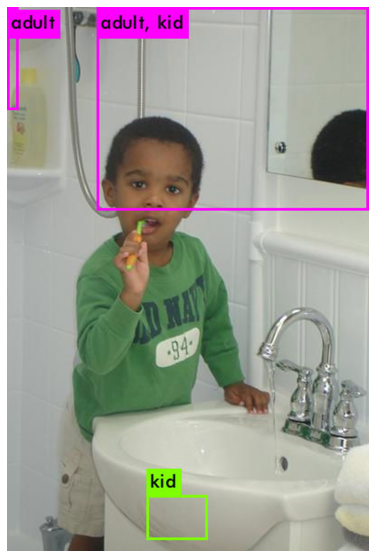

In [143]:
imShow('predictions.jpg')